# Load libraries, data 

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

2022-11-26 05:24:04.435170: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-26 05:24:05.537384: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-26 05:24:05.537681: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-11-26 05:24:05.537686: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

2022-11-26 05:24:06.972031: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-26 05:24:07.114654: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-26 05:24:07.227139: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-26 05:24:07.227184: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_nod

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5798164139170681633
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 10006560768
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 15132611659024878420
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [3]:
path= "/mnt/d/Data/"

train_csv = pd.read_csv(os.path.join(path, "train.csv"))
X_csv = train_csv[train_csv.columns[:-1]]
y = train_csv["N_category"]
test_csv = pd.read_csv(os.path.join(path, "test.csv"))
submission = pd.read_csv(os.path.join(path, "sample_submission.csv"))

In [4]:
def make_dataset(size):
    train_imgs = []
    for i in os.listdir(os.path.join(path,"train_imgs")):
        img = cv2.imread(os.path.join(path, "train_imgs/"+i))
        img = cv2.resize(img, (size, size), interpolation=cv2.INTER_AREA)
        img = np.float32(img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img/255.0
        train_imgs.append(img)
    return train_imgs
#     img_list = np.reshape(img_list, (-1, 60, 60, 3))

In [5]:
train_imgs = make_dataset(512)

In [6]:
print(f"Data len \nTrain:{len(train_csv)}, test: {len(test_csv)}")
print(f"preprocessed data shape: {np.array(train_imgs).shape}")

Data len 
Train:1000, test: 250
preprocessed data shape: (1000, 512, 512, 3)


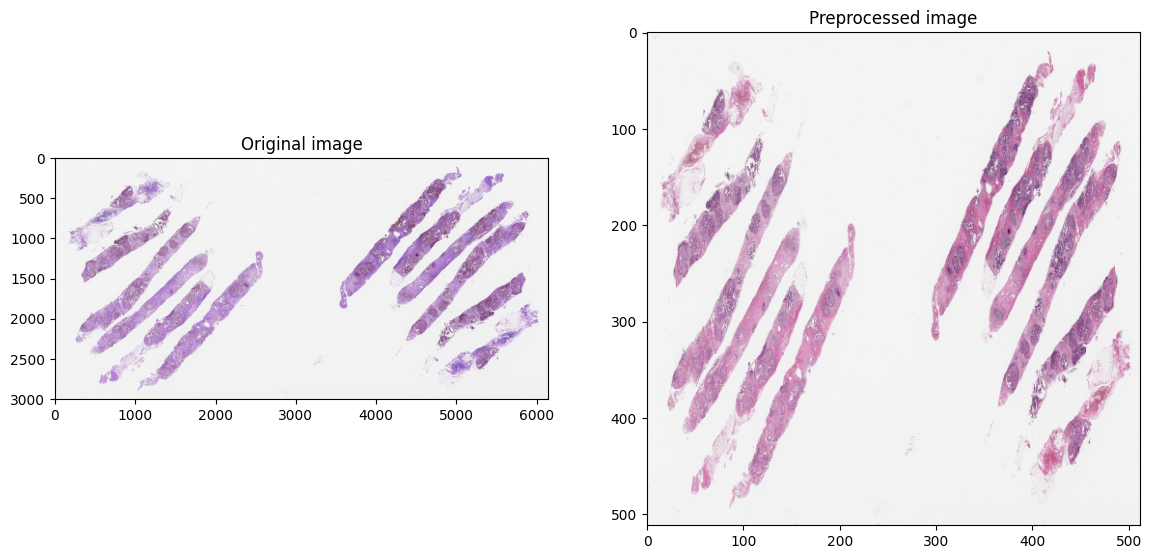

In [7]:
original = cv2.imread(os.path.join(path,"train_imgs/BC_01_0001.png"))
preprocessed = train_imgs[0]
fig, ax = plt.subplots(1, 2, figsize=(14, 10))
ax[0].set_title("Original image")
ax[0].imshow(original)
ax[1].set_title("Preprocessed image")
ax[1].imshow(preprocessed)

In [8]:
X_train = np.array(train_imgs)

# Benchmarking 

In [9]:
from tensorflow.keras.applications.resnet50 import ResNet50

base_model = ResNet50(weights='imagenet', include_top=False)
x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = keras.layers.Dense(1, activation='sigmoid')(x)

for layer in base_model.layers:
    layer.trainable = False
model = keras.models.Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='rmsprop', loss='binary_crossentropy')
# train the model on the new data for a few epochs
model.fit(X_train, y, validation_split=0.2, epochs=15, batch_size=16)

2022-11-26 05:32:45.713780: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-26 05:32:45.713861: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-26 05:32:45.713876: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-26 05:32:45.714073: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-26 05:32:45.714091: I tensorflow/compile

Epoch 1/15


2022-11-26 05:32:52.304358: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8600
2022-11-26 05:32:55.311529: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2022-11-26 05:32:55.331893: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f8a472cc5e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-11-26 05:32:55.331918: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2022-11-26 05:32:55.349909: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2022-11-26 05:32:55.498778: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of 

50/50 [==============================] - 17s 222ms/step - loss: 1.3690 - val_loss: 0.9488
Epoch 2/15
50/50 [==============================] - 9s 190ms/step - loss: 0.9114 - val_loss: 0.6918
Epoch 3/15
50/50 [==============================] - 9s 189ms/step - loss: 0.7950 - val_loss: 1.0732
Epoch 4/15
50/50 [==============================] - 9s 190ms/step - loss: 0.7575 - val_loss: 0.8385
Epoch 5/15
50/50 [==============================] - 9s 190ms/step - loss: 0.7215 - val_loss: 0.6911
Epoch 6/15
50/50 [==============================] - 10s 191ms/step - loss: 0.6983 - val_loss: 0.7227
Epoch 7/15
50/50 [==============================] - 9s 190ms/step - loss: 0.6941 - val_loss: 0.7055
Epoch 8/15
50/50 [==============================] - 9s 191ms/step - loss: 0.6859 - val_loss: 0.7652
Epoch 9/15
50/50 [==============================] - 9s 190ms/step - loss: 0.6920 - val_loss: 0.6901
Epoch 10/15
50/50 [==============================] - 9s 190ms/step - loss: 0.6900 - val_loss: 0.7498
Epoch 11

In [10]:
def make_dataset_test(size):
    train_imgs = []
    for i in os.listdir(os.path.join(path,"test_imgs")):
        img = cv2.imread(os.path.join(path, "test_imgs/"+i))
        img = cv2.resize(img, (size, size), interpolation=cv2.INTER_AREA)
        img = np.float32(img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img/255.0
        train_imgs.append(img)
    return train_imgs
test_img = make_dataset_test(512)

In [37]:
pred = model.predict(np.array(test_img))

8/8 [==============================] - 3s 358ms/step


In [38]:
pred = [int(i) for i in pred < 0.5]

In [39]:
y.value_counts()

1    514
0    486
Name: N_category, dtype: int64

In [40]:
pd.Series(pred).value_counts()

0    240
1     10
dtype: int64

In [41]:
submission["N_category"] = pred

In [42]:
submission.to_csv('./submit.csv', index=False)

In [ ]:
from sklearn import metrics
score = metrics.f1_score(y_true=y, y_pred=model.predict(X_train), average='macro')